<a href="https://colab.research.google.com/github/StavroK/stavrok.github.io/blob/master/us_medical_insurance_costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# U.S. Medical Insurance Costs

In [591]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import csv file insurance.csv, and reading first column for headers

---



In [592]:
import csv
filename = "/content/drive/MyDrive/Codeacademy/Portfolio Project/insurance.csv"
with open (filename,'r') as csv_file:
  csv_reader = csv.DictReader(csv_file)
  dict_from_csv = dict(list(csv_reader)[0])
  list_of_columns = list(dict_from_csv.keys())
  print("List of column names : ", list_of_columns)

List of column names :  ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


Converting csv file in to different list by column

In [593]:
age =[]
sex =[]
bmi =[]
children =[]
smoker=[]
region=[]
charges=[]

In [594]:
file = csv.DictReader(open(filename,'r'))

In [595]:
for col in file:
  age.append(int(col['age']))
  sex.append(col['sex'])
  bmi.append(float(col['bmi']))
  children.append(int(col['children']))
  smoker.append(col['smoker'])
  region.append(col['region'])
  charges.append(float(col['charges']))


In [596]:
print("Ages: ", age)
print("Sex: ", sex)
print("bmi: ", bmi)
print("Children: ", children)
print("Smoker: ", smoker)
print("Region: ", region)
print("Charges: ", charges)

Ages:  [19, 18, 28, 33, 32, 31, 46, 37, 37, 60, 25, 62, 23, 56, 27, 19, 52, 23, 56, 30, 60, 30, 18, 34, 37, 59, 63, 55, 23, 31, 22, 18, 19, 63, 28, 19, 62, 26, 35, 60, 24, 31, 41, 37, 38, 55, 18, 28, 60, 36, 18, 21, 48, 36, 40, 58, 58, 18, 53, 34, 43, 25, 64, 28, 20, 19, 61, 40, 40, 28, 27, 31, 53, 58, 44, 57, 29, 21, 22, 41, 31, 45, 22, 48, 37, 45, 57, 56, 46, 55, 21, 53, 59, 35, 64, 28, 54, 55, 56, 38, 41, 30, 18, 61, 34, 20, 19, 26, 29, 63, 54, 55, 37, 21, 52, 60, 58, 29, 49, 37, 44, 18, 20, 44, 47, 26, 19, 52, 32, 38, 59, 61, 53, 19, 20, 22, 19, 22, 54, 22, 34, 26, 34, 29, 30, 29, 46, 51, 53, 19, 35, 48, 32, 42, 40, 44, 48, 18, 30, 50, 42, 18, 54, 32, 37, 47, 20, 32, 19, 27, 63, 49, 18, 35, 24, 63, 38, 54, 46, 41, 58, 18, 22, 44, 44, 36, 26, 30, 41, 29, 61, 36, 25, 56, 18, 19, 39, 45, 51, 64, 19, 48, 60, 27, 46, 28, 59, 35, 63, 40, 20, 40, 24, 34, 45, 41, 53, 27, 26, 24, 34, 53, 32, 19, 42, 55, 28, 58, 41, 47, 42, 59, 19, 59, 39, 40, 18, 31, 19, 44, 23, 33, 55, 40, 63, 54, 60, 24, 

Now that we have our data, let's gest some descriptive statistics. Measures of frequency, central tendency, dispersion/variation, position. Representation will be subject to the nature of our column. Is it a numerical column or a categorical. If categorical is it ordinal, normative and binary. If numerical can be discrete or continuous. Nature of data will determine how each will be analyzed.

* Ages is a categorical ordinal data
* Sex is categorical binary data
* Bmi is numerical contiuous data
* Children is numerical discrete data
* Smoker is categorical binary data
* Region is categorical normative data
* Charges is numerical contiuous data

In [597]:
from scipy import stats
import numpy as np

In [598]:
def namestr(obj):
   return [name for name in globals() if globals()[name] is obj][0]

In [599]:
def stats_description(list):
  print("For "+ namestr(list)+" " + str(stats.describe(list)))

In [600]:
def binary_description(list):
  print("For "+ namestr(list)+ " Mode is: " + str(stats.mode(list))+ ", total items is: " + str(len(list)))

In [601]:
stats_description(age)
binary_description(sex)
stats_description(bmi)
stats_description(children)
binary_description(smoker)
stats_description(charges)
binary_description(region)

For age DescribeResult(nobs=1338, minmax=(18, 64), mean=39.20702541106129, variance=197.40138665754375, skewness=0.055610083072599126, kurtosis=-1.2449206804584227)
For sex Mode is: ModeResult(mode=array(['male'], dtype='<U6'), count=array([676])), total items is: 1338
For bmi DescribeResult(nobs=1338, minmax=(15.96, 53.13), mean=30.66339686098655, variance=37.18788360977323, skewness=0.28372857291709386, kurtosis=-0.05502310583700032)
For children DescribeResult(nobs=1338, minmax=(0, 5), mean=1.0949177877429, variance=1.453212745666905, skewness=0.9373281163874423, kurtosis=0.1972174268623732)
For smoker Mode is: ModeResult(mode=array(['no'], dtype='<U3'), count=array([1064])), total items is: 1338
For charges DescribeResult(nobs=1338, minmax=(1121.8739, 63770.42801), mean=13270.422265141257, variance=146652372.15285498, skewness=1.5141797118745743, kurtosis=1.595821363956751)
For region Mode is: ModeResult(mode=array(['southeast'], dtype='<U9'), count=array([364])), total items is: 1

Now let's see this information on a visual, for numerical categorical values we will use a histogram

In [602]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [603]:
def histogram_graph(list):
  df = pd.DataFrame(list)
  sns.histplot(data=df)

In [604]:
def pie_chart(list):
  frequency={}
  name = namestr(list)
  for item in list:
    if item in frequency:
      frequency[item] += 1
    else:
      frequency[item] = 1
  data = frequency.values()
  keys = frequency.keys()
 
  fig1, ax1 = plt.subplots(figsize =(10, 7))
  ax1.pie(data, labels = keys, autopct='%1.1f%%', shadow=True, startangle=90)
 
  plt.show()
  print(frequency)

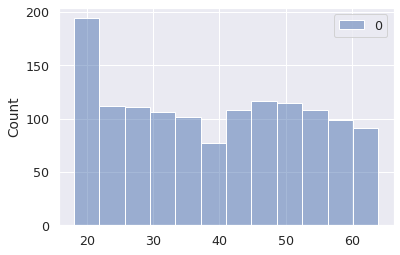

In [605]:
histogram_graph(age)

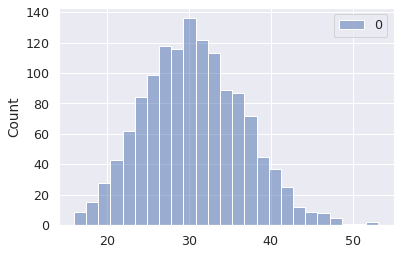

In [606]:
histogram_graph(bmi)

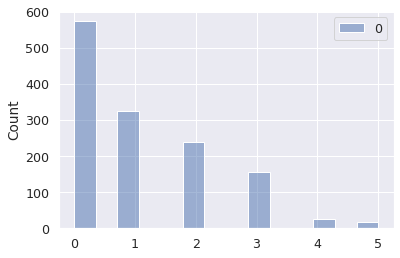

In [607]:
histogram_graph(children)

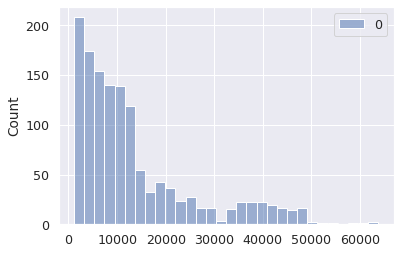

In [608]:
histogram_graph(charges)

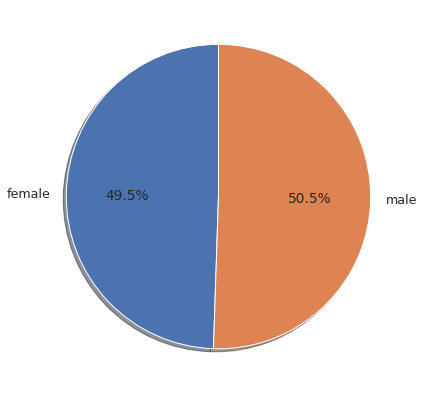

{'female': 662, 'male': 676}


In [609]:
pie_chart(sex)

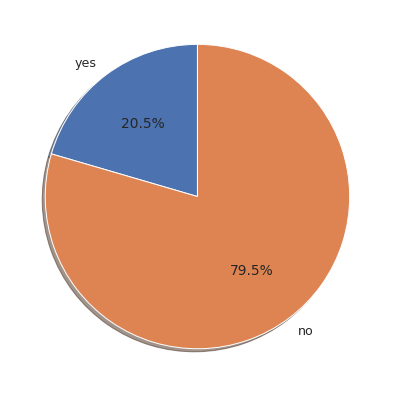

{'yes': 274, 'no': 1064}


In [610]:
pie_chart(smoker)

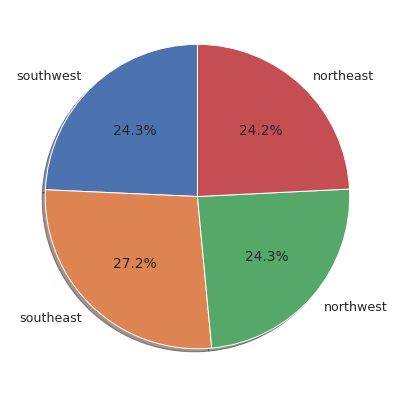

{'southwest': 325, 'southeast': 364, 'northwest': 325, 'northeast': 324}


In [611]:
pie_chart(region)

Now let us see how are the top 5 elements with highest charges and lowest charges

In [612]:
filename = "/content/drive/MyDrive/Codeacademy/Portfolio Project/insurance.csv"
df = pd.read_csv(filename)
df_sorted_desc = df.sort_values(by=['charges'], ascending=False)
print("These are the Top 5 individuals with the highest charges in the file")
df_sorted_desc.head()

These are the Top 5 individuals with the highest charges in the file


,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209


In [613]:
df_sorted_asc = df.sort_values(by=['charges'], ascending=True)
print("These are the Top 5 individuals with the lowest charges in the file")
df_sorted_asc.head()

These are the Top 5 individuals with the lowest charges in the file


,age,sex,bmi,children,smoker,region,charges
940,18,male,23.21,0,no,southeast,1121.8739
808,18,male,30.14,0,no,southeast,1131.5066
1244,18,male,33.33,0,no,southeast,1135.9407
663,18,male,33.66,0,no,southeast,1136.3994
22,18,male,34.10,0,no,southeast,1137.0110


Now we will visualize multivariate 

In [614]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
charges = pd.read_csv(filename)

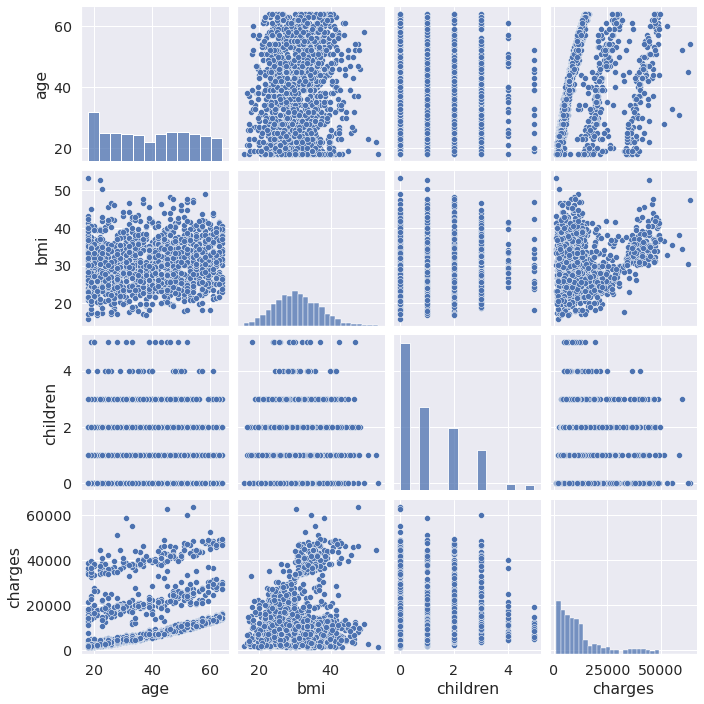

In [615]:
sns.pairplot(charges);

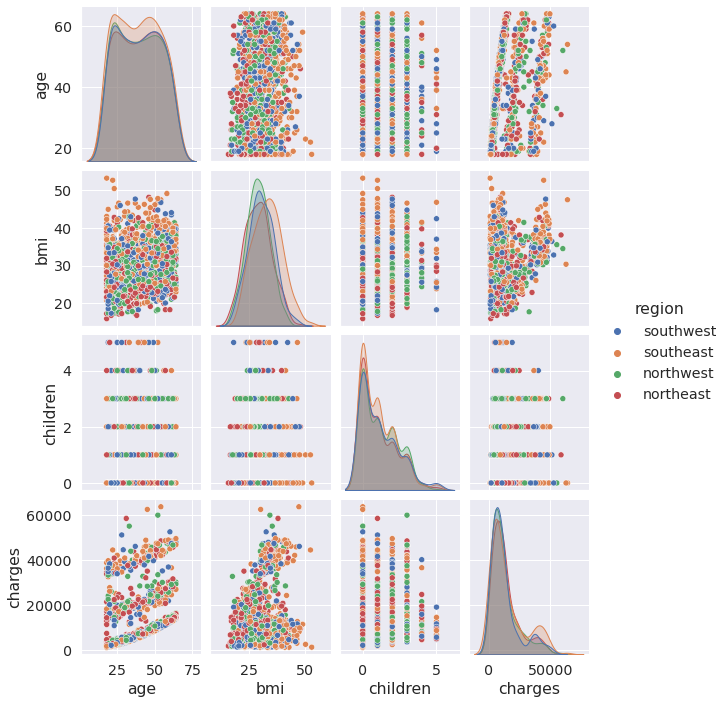

In [616]:
sns.pairplot(
    data= charges, 
    aspect=.85,
    hue='region');

In [617]:
charges.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


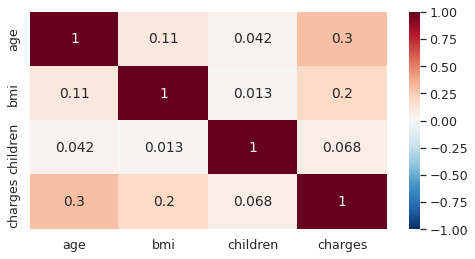

In [618]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    charges.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);